In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import skew

In [2]:
# There is given file explaining about every column of the data. 

with open(r"C:\Users\aakas\Documents\DataSets\competetion\house price pred\data_description.txt") as f:
    data_description_file = f.read()
    print(data_description_file)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Importing Train and test datasets:

In [3]:
train = pd.read_csv(r"C:\Users\aakas\Documents\DataSets\competetion\house price pred\train.csv")
test = pd.read_csv(r"C:\Users\aakas\Documents\DataSets\competetion\house price pred\test.csv")

y = train['SalePrice'] # naming the y as output column of main data so I can drop output from main data.
train.drop('SalePrice',axis=1, inplace=True) # Dropping the output column from the train data.

# Combining training and test data.
df = pd.concat([train,test])
df = df.reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Missing Values Treatment

In [5]:
n_missing_value = pd.DataFrame({'isnull' :df.isnull().sum().sort_values(ascending=False).head(37),
                              'percent' :df.isnull().sum().sort_values(ascending=False).head(37)/len(df)*100})
n_missing_value

,isnull,percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


#### There is a lot of values missing in almost 35 columns, however the description_file given with data helps in filling most of the values of these columns.
#### Below i have filled many columns based on the file given with data

In [6]:
# Data points whose only 1 or 2 values are missing are filled using mode.

lst = ['BsmtHalfBath','Functional','Utilities','BsmtFullBath','Electrical','BsmtFinSF1','Exterior1st',
       'Exterior2nd','GarageCars','GarageArea','KitchenQual','SaleType','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','ExterQual']

for i in lst:
    df[i].replace(np.nan, df[i].mode()[0], inplace=True)
    
    
# columns with no garge values.

gar_fill = ['GarageType','GarageCond','GarageFinish','GarageQual']

for i in gar_fill:
    df[i].replace(np.nan, 'no garage',inplace=True)
    
    
# columns with missing basement values.

    bsmt_fill = ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']

for i in bsmt_fill:
    df[i].replace(np.nan, 'no bsmt',inplace=True)
    
    
# Columns with none value filled using data_description_file.
df['Alley'].fillna(value='no alley',inplace=True)
df['PoolQC'].fillna(value='No pool',inplace=True)
df['MiscFeature'].fillna(value='no feature',inplace=True)
df['Fence'].fillna(value='no fence',inplace=True)
df['FireplaceQu'].fillna(value='no fireplace',inplace=True)


# Some more columns to fill.
df['GarageYrBlt'].fillna(value=0,inplace=True)
df['MasVnrArea'].fillna(value=0, inplace=True)
df['MasVnrType'].fillna(value='None',inplace=True)
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [7]:
# Filling some categorical values manually into numerical(its optional to fill them manually as One-Hot Encoding can fill
#  - these values as well.)

# Creating a list to fill most of the categorical values with numerical values using map() function.
value_map = {'TA':5,'Gd':7,'Ex':9,'Fa':3,'no bsmt':0,'Po':2,'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6,
            'no fireplace':0,'no garage':0,'No pool':0,'no fence':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1}

df['KitchenQual'] = df['KitchenQual'].map(value_map).astype('int')

df['BsmtCond'] = df['BsmtCond'].map(value_map).astype('int')
df['BsmtQual'] = df['BsmtQual'].map(value_map).astype('int')

df['BsmtFinType1'] = df['BsmtFinType1'].map(value_map).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map(value_map).astype('int')

df['FireplaceQu'] = df['FireplaceQu'].map(value_map).astype('int')

df['GarageCond'] = df['GarageCond'].map(value_map).astype('int')
df['GarageQual'] = df['GarageQual'].map(value_map).astype('int')

df['PoolQC'] = df['PoolQC'].map(value_map).astype('int')

df['Fence'] = df['Fence'].map(value_map).astype('int')

df['ExterCond'] = df['ExterCond'].map(value_map).astype('int')
df['ExterQual'] = df['ExterQual'].map(value_map).astype('int')
df['HeatingQC'] = df['HeatingQC'].map(value_map).astype('int')

## Checking and Handling Skewed Data

In [8]:
# Calling numerical dtypes data from the original data.

numerical = [x for x in dict(df.dtypes) if dict(df.dtypes)[x] in ['float64','int64']]
numerical_data = df[numerical]


# picking highly skewed columns from the data.
poss_skew = numerical_data.columns
show_skew = np.abs(df[poss_skew].apply(lambda x: skew(x)).sort_values(ascending = False))# using numpy to get skewed data.
high_skew = show_skew[show_skew>0.3] # higher than 0.3 means high skewness although some conisder high skewness in value
                                    # - higher than 0.5.
    
print('Columns with high skewness in data:')
print('')
print(high_skew.head(5)) # Showing some skewned columns.
show_index = high_skew.index

# Function to correct skewness using log function.
for i in show_index:
    df[i] = np.log1p(df[i])

Columns with high skewness in data:

MiscVal         21.947195
PoolArea        16.898328
LotArea         12.822431
LowQualFinSF    12.088761
3SsnPorch       11.376065
dtype: float64


## Dropping Outliers

In [9]:
# Getting only training data from combined data for Graph plotting.
train_graph = df.iloc[ :len(y), : ]
train_graph = train_graph.join(y)

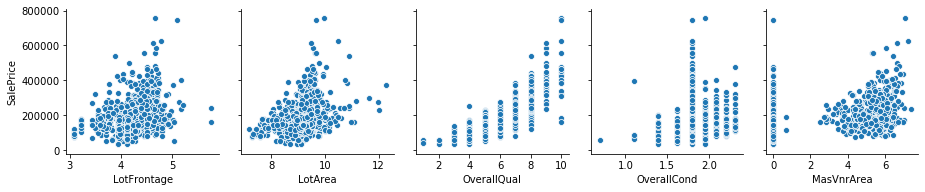

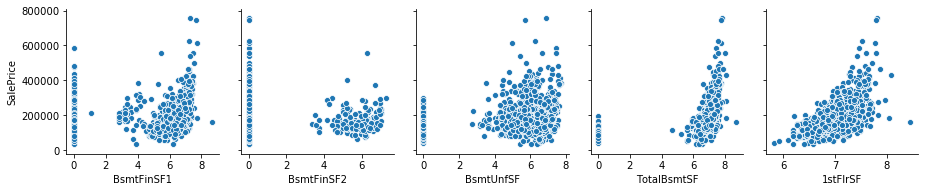

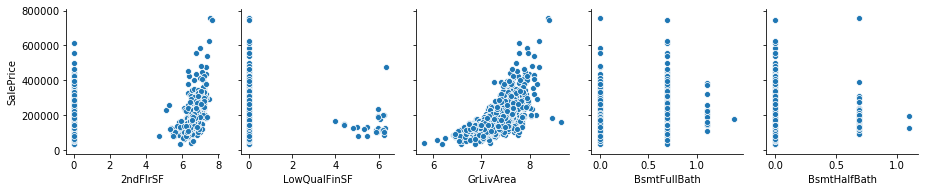

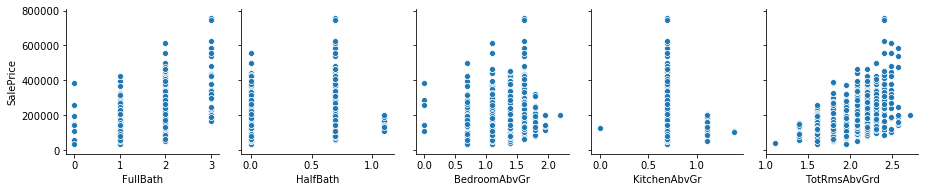

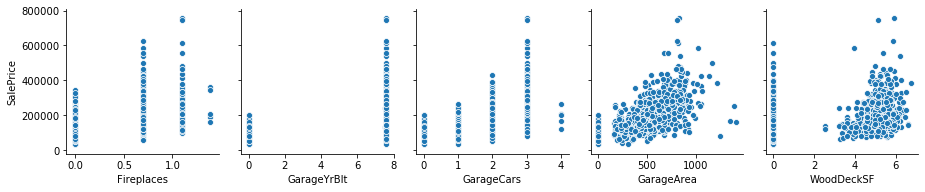

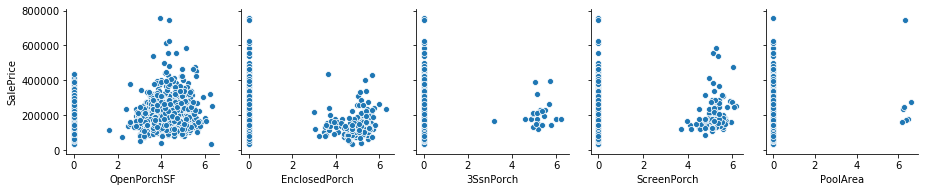

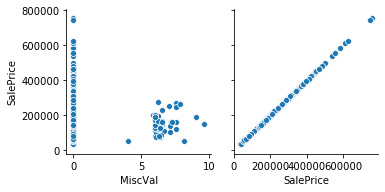

In [10]:
# Plotting numerical columns of the data.
sns.pairplot(data=train_graph, y_vars=['SalePrice'], x_vars=['LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'])
sns.pairplot(data=train_graph,y_vars=['SalePrice'],x_vars=[ 'MiscVal','SalePrice'])

In [11]:
# Joining the y/output column to the combined data for removing oultliers.

df = df.join(y)
# Shape of the data is (2919,81) before removing outliers.

In [12]:
# Removing outliers manually using above pairplot.
df = df.drop(df[(df['OverallCond']<0.8)&(df['SalePrice']>300000)].index)
df = df.drop(df[(df['OverallCond']>1)&(df['SalePrice']>700000)].index)
df = df.drop(df[(df['OverallQual']>9)&(df['SalePrice']<300000)].index)
df = df.drop(df[(df['MasVnrArea']<1)&(df['SalePrice']>700000)].index)
df = df.drop(df[(df['BsmtHalfBath']>0.5)&(df['SalePrice']>600000)].index)
df = df.drop(df[(df['PoolArea']>1.5)&(df['SalePrice']>600000)].index)

In [13]:
df.reset_index(drop=True,inplace=True)
y = df['SalePrice']
y.dropna(inplace=True)
df.drop('SalePrice',axis=1,inplace=True)
df.shape
# Shape of the data after removing outliers (2914,81).

(2915, 80)

## One-Hot Encoding/ dummy Variables

In [14]:
# Getting categorical data to create Dummy Variables.

catgorical = [x for x in dict(df.dtypes) if dict(df.dtypes)[x] in ['object']]
catgorical_data = df[catgorical]

In [15]:
cat_dum = pd.get_dummies(catgorical_data, drop_first=True)
df.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
       axis=1,inplace=True)

df = pd.concat([df,cat_dum],axis=1)
# Shape of the data (2914,215)

## Training model

In [24]:
# Seperating training and test data which were combined in the begnning.
train_f = df.iloc[ :len(y), : ]
train_f = train_f.join(y)
submission_set = df.iloc[len(train_f): , : ]

In [17]:
X = train_f.drop('SalePrice',axis=1)
y = train_f['SalePrice']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train) # Fitting the model to the data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
prediction = lr.predict(X_test) # Predicting test set sale values using trained model.

In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('mean absolute error:', metrics.mean_absolute_error(y_test, prediction))
print('\n')
print('r2_score:', r2_score(y_test,prediction))

mean absolute error: 18612.720650899315


r2_score: 0.8765675302311523


### Finally predicting the values of  a Fresh set of data and submitting on kaggle competetion.

In [26]:
submission_set.reset_index(drop=True,inplace=True)
prediction_test = lr.predict(submission_set)

In [27]:
submission = pd.DataFrame({'Id':submission_set['Id'], 'SalePrice':prediction_test})
submission.to_csv('saleprice submission',index=False)

### Receieved an error rate on Fresh set  of  0.21